<a href="https://colab.research.google.com/github/vinayykkumar/Forecasting-Trends-with-Powerful-LSTM_Models_Infosys_Internship_Oct2024/blob/Samyuktha/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN-LSTM for Time Series Forecasting**

This project demonstrates how to use a hybrid CNN-LSTM (Convolutional Neural Network + Long Short-Term Memory) model to predict future values of a time series dataset.
We use the Daily Minimum Temperatures in Melbourne, Australia (1981–1990) dataset for this demonstration.


In [1]:
!pip install tensorflow pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


**Load the Dataset**

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)


**Preprocess the Data**

Extract and normalize the temperature column:


In [3]:
data = df['Temp'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


Create sequences of input-output pairs:

In [4]:
def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(data_scaled, time_steps)


Split the data into training and testing sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Reshape data for CNN:

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


**Build the CNN-LSTM Model**

In [7]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 8, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,307 (91.04 KB)

 Trainable params: 23,307 (91.04 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [8]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0499 - val_loss: 0.0116
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - val_loss: 0.0112
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - val_loss: 0.0099
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - val_loss: 0.0090
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val

**Evaluate and Visualize Results**
Plot training and validation loss:

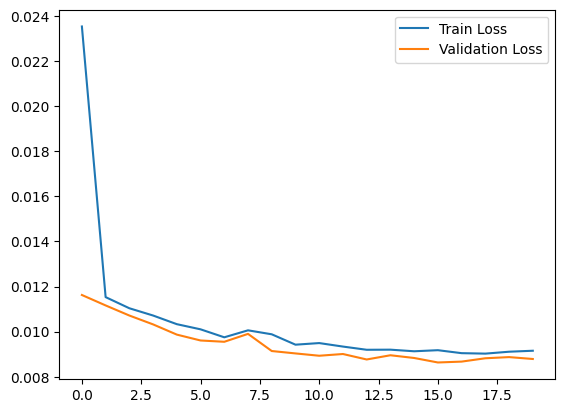

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


Make predictions and visualize the results:

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


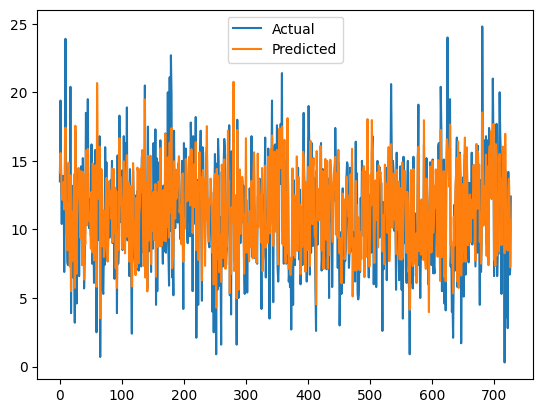

In [10]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.show()
